In [1]:
# For data operations
import pandas as pd

# For visualisations
import seaborn as sns

# For visualisations
import matplotlib.pyplot as plt

# To set the styles for the visualisations
from matplotlib import style
style.use('seaborn')

# To find Optimal parameters for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# TO split the data into training and testing sets
from sklearn.model_selection import train_test_split

# To scale the Data
from sklearn.preprocessing import StandardScaler

#importing various Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsClassifier

# To measure the model performance
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the data from the csv file
car_data = pd.read_csv('C:/Users/Shubham/OneDrive - Teesside University/Machine Learning Lab/ford.csv')

In [3]:
# Getting the idea of the data we are dealing with
car_data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [4]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [5]:
# checking any null entries
car_data.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [6]:
# Getting statistical information about the dataset
car_data.describe()

,year,price,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,113.329456,57.906980,1.350807
std,2.050336,4741.343657,19472.054349,62.012456,10.125696,0.432367
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


In [7]:
car_data.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

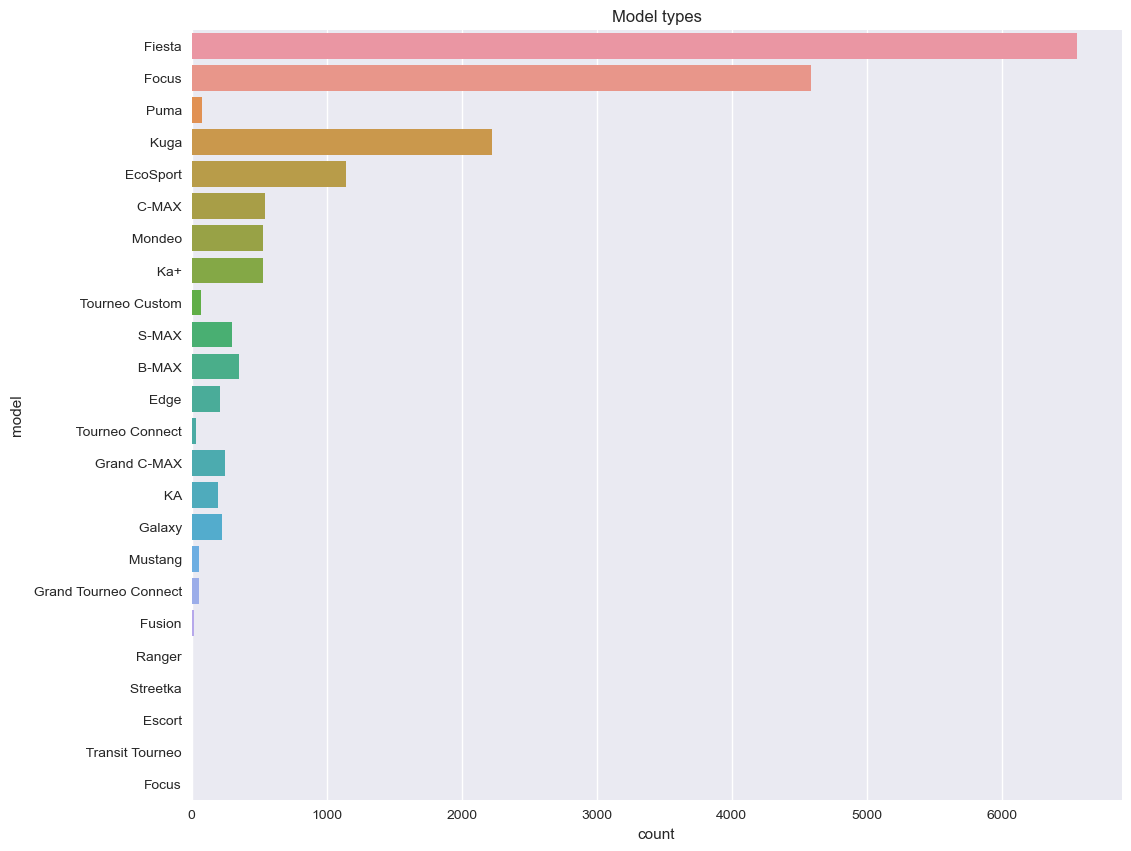

In [8]:
# Exploring the categorical data of model types
plt.figure(figsize=(12,10))
sns.countplot(y='model', data=car_data)
plt.title('Model types')
plt.show()


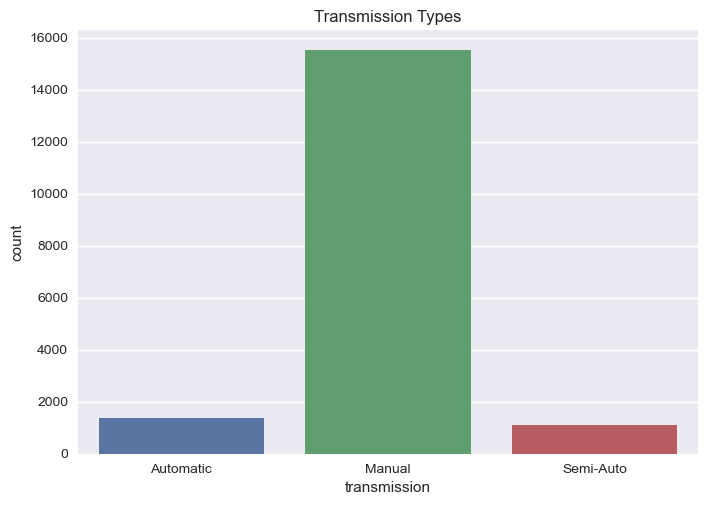

In [9]:
# Exploring the categorical data of transmission types
sns.countplot(x='transmission', data=car_data)
plt.title('Transmission Types')
plt.show()

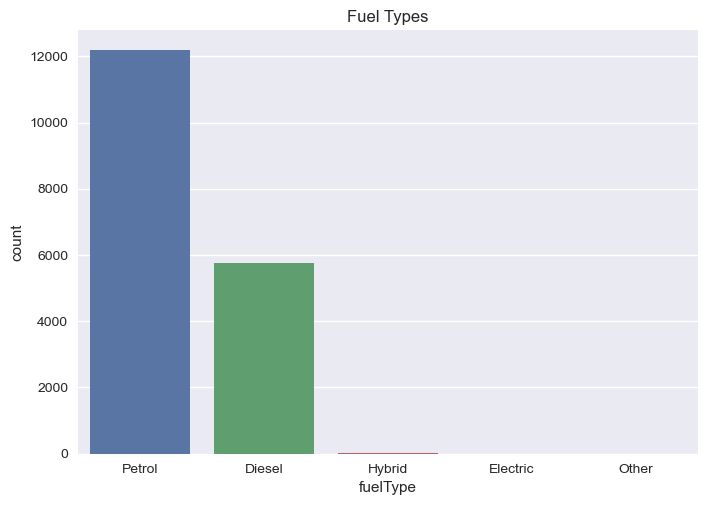

In [10]:
# Exploring the categorical data of fuel types
sns.countplot(x='fuelType', data=car_data)
plt.title('Fuel Types')
plt.show()

In [11]:
# To see numerical values of different categorical data
print(car_data['model'].value_counts())
print("\n\n")
print(car_data['transmission'].value_counts())
print("\n\n")
print(car_data['fuelType'].value_counts())

 Fiesta                   6557
 Focus                    4588
 Kuga                     2225
 EcoSport                 1143
 C-MAX                     543
 Ka+                       531
 Mondeo                    526
 B-MAX                     355
 S-MAX                     296
 Grand C-MAX               247
 Galaxy                    228
 Edge                      208
 KA                        199
 Puma                       80
 Tourneo Custom             69
 Grand Tourneo Connect      59
 Mustang                    57
 Tourneo Connect            33
 Fusion                     16
 Streetka                    2
 Ranger                      1
 Escort                      1
 Transit Tourneo             1
Focus                        1
Name: model, dtype: int64



Manual       15518
Automatic     1361
Semi-Auto     1087
Name: transmission, dtype: int64



Petrol      12179
Diesel       5762
Hybrid         22
Electric        2
Other           1
Name: fuelType, dtype: int64


<AxesSubplot:xlabel='transmission', ylabel='price'>

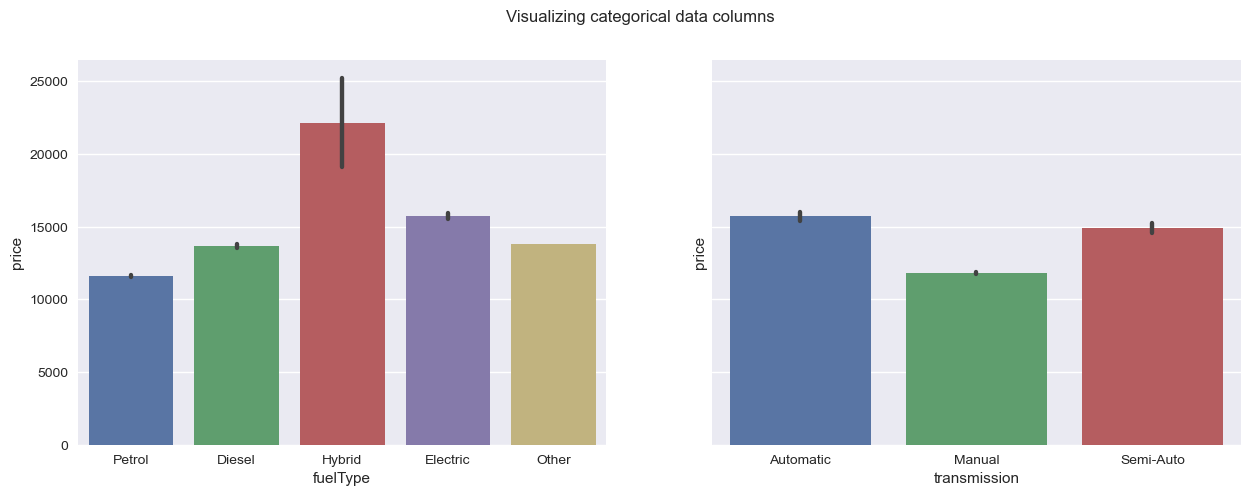

In [12]:
# Creating a variable to store the data from the column
fuelType = car_data['fuelType']
transmission = car_data['transmission']
price = car_data['price']
fig, axes = plt.subplots(1,2, figsize=(15,5), sharey=True)
fig.suptitle('Visualizing categorical data columns')
sns.barplot(x=fuelType, y=price, ax=axes[0])
sns.barplot(x=transmission, y=price, ax = axes[1])

In [13]:
# performing ordinal encoding on the data to convert into numerical values.
car_data.replace({'transmission':{'Manual':0, 'Automatic':1, 'Semi-Auto':2}}, inplace=True)
car_data.replace({'fuelType':{'Petrol':0, 'Diesel':1, 'Hybrid':2, 'Electric':3, 'Other':4}}, inplace=True)

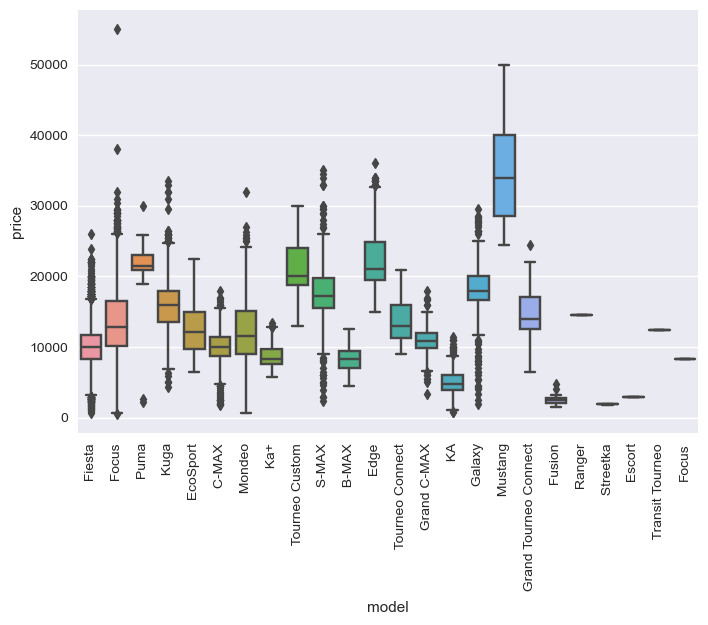

In [14]:
# car price value based on model
ax = sns.boxplot(data=car_data, x=car_data['model'], y=car_data['price'])
ax.tick_params(axis='x', rotation=90)

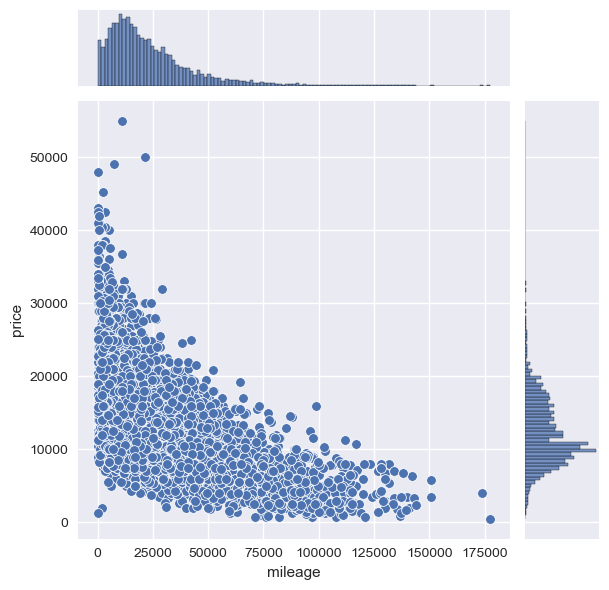

In [15]:
# car price value based on mileage driven
sns.jointplot(data=car_data, x=car_data['mileage'], y=car_data['price'])

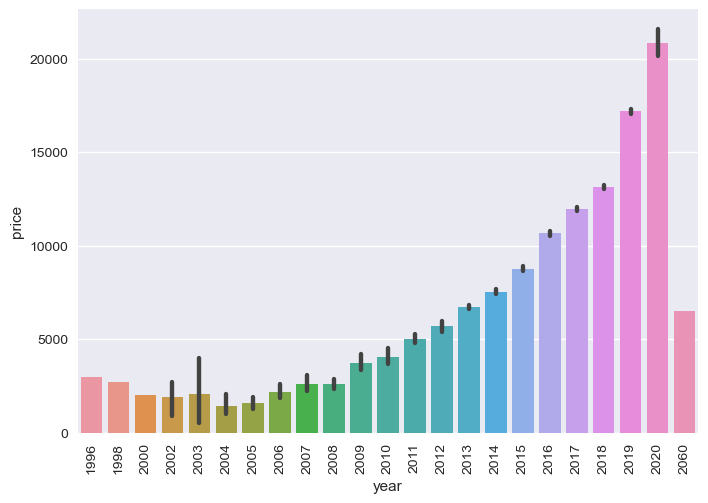

In [16]:
# car price value based on manufacured year
ax = sns.barplot(data=car_data, x=car_data['year'], y=car_data['price'])
ax.tick_params(axis='x', rotation=90)

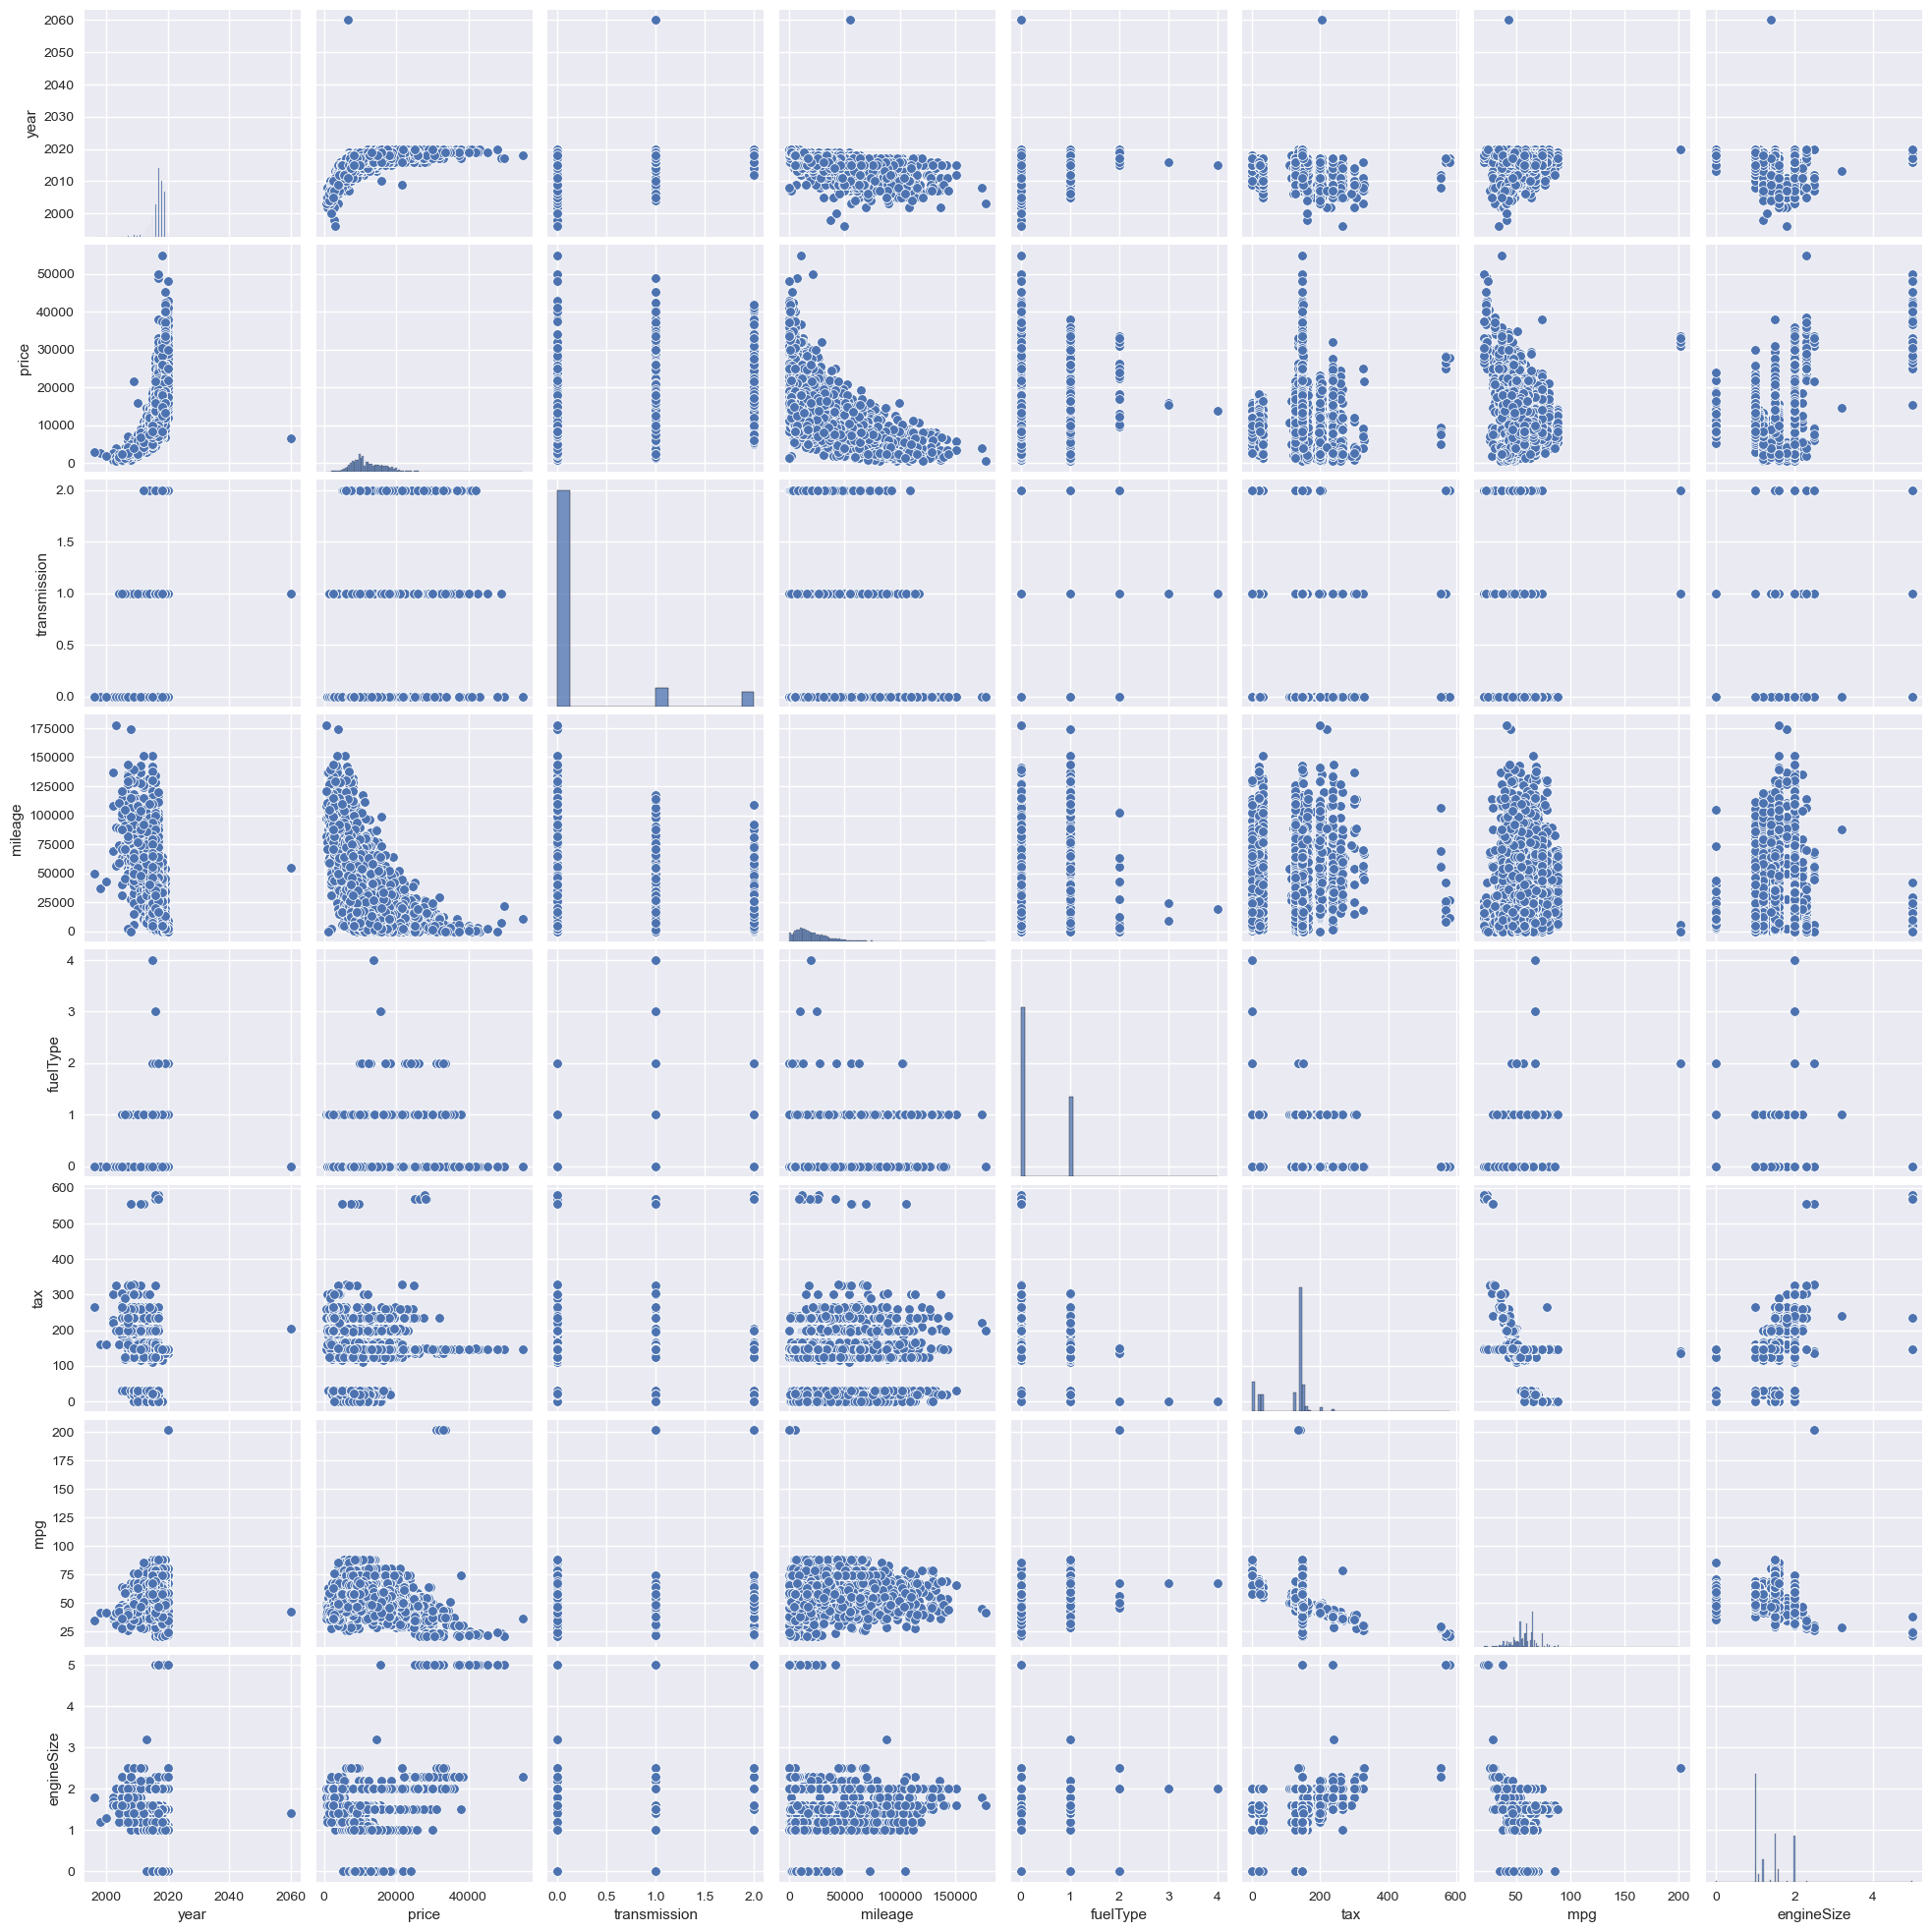

In [17]:
# pairplot 
sns.pairplot(car_data)

In [18]:
# using the head function to see the modified data
car_data.head()
# dropping the model column
car_data = car_data.drop("model", axis=1)

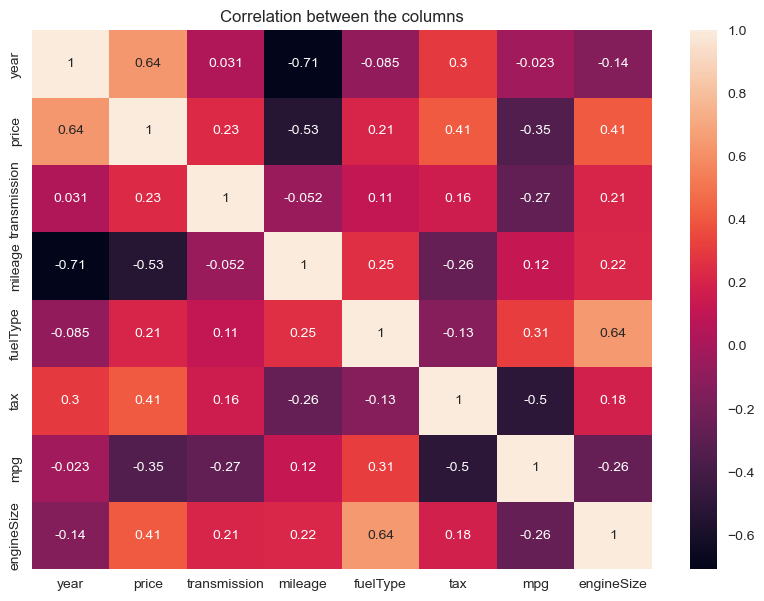

In [19]:
# visualising heat map to show correlation between attributes and the target column
plt.figure(figsize=(10,7))
sns.heatmap(car_data.corr(), annot=True)
plt.title('Correlation between the columns')
plt.show()

In [20]:
# sorting the correlation of the price column
car_data.corr()['price'].sort_values()

mileage        -0.530659
mpg            -0.346419
fuelType        0.209225
transmission    0.231806
tax             0.406857
engineSize      0.411178
year            0.636009
price           1.000000
Name: price, dtype: float64

<AxesSubplot:title={'center':'Correlation between year and price'}, xlabel='price', ylabel='year'>

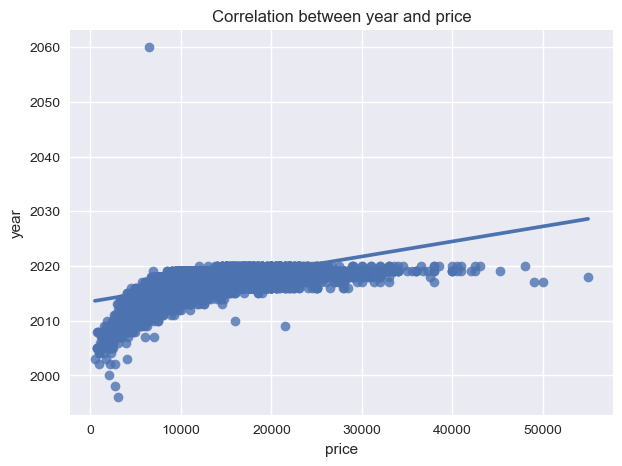

In [21]:
# plotting regression plot
fig = plt.figure(figsize=(7,5))
plt.title('Correlation between year and price')
sns.regplot(x='price', y='year', data=car_data)

In [22]:
# splitting the data into x and y
X = car_data.drop('price', axis=1)
y = car_data['price']

In [23]:
# printing thee shape of x and y
print("Shape of X is :", X.shape)
print("Shape of y is :", y.shape)

Shape of X is : (17966, 7)
Shape of y is : (17966,)


In [24]:
# splitting the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# printing the shape of training and testing data
print("Shape of X_train is: ", X_train.shape)
print("Shape of y_train is: ", y_train.shape)
print("Shape of X_test is: ", X_test.shape)
print("Shape of y_test is: ", y_test.shape)

Shape of X_train is:  (14372, 7)
Shape of y_train is:  (14372,)
Shape of X_test is:  (3594, 7)
Shape of y_test is:  (3594,)


In [26]:
# normalising the data
scaler = StandardScaler()

In [27]:
# applying normalisation on X data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
# creating the liear regression model
linreg = LinearRegression()
linreg.fit(X_train, y_train)
linreg_pred = linreg.predict(X_test)

In [29]:
# evaluating the linear regression model performance
linreg_mae = mean_absolute_error(y_test, linreg_pred)
linreg_r2 = r2_score(y_test, linreg_pred)
print("MAE of linear regression model is:", linreg_mae)
print("R2 score of linear regression model is:", linreg_r2)

MAE of linear regression model is: 1778.2319322410349
R2 score of linear regression model is: 0.7379425731911509


In [30]:
# performing cross validation on test data
linreg_score = cross_val_score(linreg, X_test, y_test, cv=4)
print("Linear Regression model accuracy is: {}".format(linreg_score.mean()*100))

Linear Regression model accuracy is: 73.87545898136361


In [31]:
# Defining the hyperparameters to tune
parameters = {'fit_intercept': [True, False],
             'normalize': [True, False],
             'copy_X': [True, False]}

In [32]:
# Creating the GridSearchCV object for linear regression model
linreg_cv = GridSearchCV(LinearRegression(), param_grid=parameters, cv=5)

In [33]:
# Fitting the GridSearchCV object to training data
linreg_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]})

In [34]:
# Printing the best hyperparameters found
print("Best hyperparameters:", linreg_cv.best_params_)

Best hyperparameters: {'copy_X': True, 'fit_intercept': True, 'normalize': True}


In [35]:
# Using the best hyperparameters to predict on the test data
linreg_pred = linreg_cv.predict(X_test)

In [36]:
# Calculating the MAE and R2 score for the model with the best hyperparameters
linreg_mae = mean_absolute_error(y_test, linreg_pred)
linreg_r2 = r2_score(y_test, linreg_pred)
print("MAE of linear regression model with best hyperparameters:", linreg_mae)
print("R2 score of linear regression model with best hyperparameters:", linreg_r2)

MAE of linear regression model with best hyperparameters: 1778.2319322410349
R2 score of linear regression model with best hyperparameters: 0.7379425731911511


In [37]:
# creating the decision model
dtree = DecisionTreeRegressor()
dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)

In [38]:
# evaluating the decision tree model performance
dtree_mae = mean_absolute_error(y_test, dtree_pred)
dtree_r2 = r2_score(y_test, dtree_pred)
print("MAE of decision tree model is:", dtree_mae)
print("R2 score of decision tree model is:", dtree_r2)

MAE of decision tree model is: 1174.6750602856614
R2 score of decision tree model is: 0.8597171999082486


In [39]:
# performing cross validation on test data
dtree_score = cross_val_score(dtree, X_test, y_test, cv=4)
print("Decision Tree model accuracy is: {}".format(dtree_score.mean()*100))

Decision Tree model accuracy is: 82.3626463016493


In [40]:
# Defining the hyperparameters for the decision tree model
parameters = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 5, 10]
}

In [41]:
# Creating the GridSearchCV object for decision tree model
dtree_cv = GridSearchCV(DecisionTreeRegressor(), param_grid=parameters, cv=5)

In [42]:
# Fitting the GridSearchCV object to training data
dtree_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 15]})

In [43]:
# Printing the best hyperparameters found
print("Best hyperparameters:", dtree_cv.best_params_)

Best hyperparameters: {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 15}


In [44]:
# Using the best hyperparameters to predict on the test data
dtree_pred = dtree_cv.predict(X_test)

In [45]:
# Calculating the MAE and R2 score for the model with the best hyperparameters
dtree_mae = mean_absolute_error(y_test, dtree_pred)
dtree_r2 = r2_score(y_test, dtree_pred)
print("MAE of decision tree model with best hyperparameters:", dtree_mae)
print("R2 score of decision tree model with best hyperparameters:", dtree_r2)

MAE of decision tree model with best hyperparameters: 1007.3313843147844
R2 score of decision tree model with best hyperparameters: 0.9031300534856432


In [46]:
# creating the XGBoost model
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
xgb_prediction = xgb.predict(X_test)

In [47]:
# evaluating the XGBoost model performance
xgb_mae = mean_absolute_error(y_test, xgb_prediction)
xgb_r2 = r2_score(y_test, xgb_prediction)
print("MAE of xgboost model is:", xgb_mae)
print("R2 score of xgboost model is:", xgb_r2)

MAE of xgboost model is: 914.1581133384472
R2 score of xgboost model is: 0.9196627631595996


In [48]:
# performing cross validation on test data
xgb_score = cross_val_score(xgb, X_test, y_test, cv=4)
print("xgboost model accuracy is: {}".format(xgb_score.mean()*100))

xgboost model accuracy is: 89.60526998355522


In [49]:
#printing best cross validation score
print("best cross validation score: {:.2f}".format(grid.best_score_))
print("best parameters: ", grid.best_params_)

NameError: name 'grid' is not defined

In [50]:
# Defining the hyperparameters to tune
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 4, 5],
    'n_estimators': [50, 100, 150]
}

In [51]:
# Creating a GridSearchCV object with the XGBoost model and the hyperparameters
xgb_grid = GridSearchCV(XGBRegressor(), param_grid=param_grid, cv=5)

In [52]:
# Fitting the GridSearchCV object to the training data
xgb_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
 

In [53]:
# Printing the best hyperparameters found
print("Best hyperparameters:", xgb_grid.best_params_)


Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}


In [54]:
# Using the best hyperparameters to predict on the test data
xgb_pred = xgb_grid.predict(X_test)

In [55]:
# Calculating the MAE and R2 score for the model with the best hyperparameters
xgb_mae = mean_absolute_error(y_test, xgb_pred)
xgb_r2 = r2_score(y_test, xgb_pred)
print("MAE of XGBoost model with best hyperparameters:", xgb_mae)
print("R2 score of XGBoost model with best hyperparameters:", xgb_r2)

MAE of XGBoost model with best hyperparameters: 932.5599693506375
R2 score of XGBoost model with best hyperparameters: 0.9168357941605024


In [56]:
car_data.columns

Index(['year', 'price', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg',
       'engineSize'],
      dtype='object')

In [57]:
car_data.head()

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,2017,12000,1,15944,0,150,57.7,1.0
1,2018,14000,0,9083,0,150,57.7,1.0
2,2017,13000,0,12456,0,150,57.7,1.0
3,2019,17500,0,10460,0,145,40.3,1.5
4,2019,16500,1,1482,0,145,48.7,1.0


In [58]:
# creating new data for the model to predict
data = {'year':2017, 'transmission':1, 'mileage':15944, 'fuelType':0, 'tax':150, 'mpg':57.7,
       'engineSize':1.0}
index= [0]
new_car_data = pd.DataFrame(data, index)
new_car_data

,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,2017,1,15944,0,150,57.7,1.0


In [59]:
# implementing the data created to the XGB model
new_prediction = xgb_grid.predict(new_car_data)
print("The car price for the new data is: ", new_prediction)


The car price for the new data is:  [11068.842]
